### Stellar Classification vis-à-vis **Convolutional Neural Network**

AUTHOR:  Anurag Dutta (anuragdutta.research@gmail.com)

CREATED: 2023-01-03 11:47:55

DATASET: https://github.com/Anurag-Dutta/Stellar-Classification-vis---vis-Convolutional-Neural-Network/tree/main/dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Winter Research 23/dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64, 64)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Winter Research 23/dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64, 64)
)

Found 3986 files belonging to 2 classes.
Found 796 files belonging to 2 classes.


In [16]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
125/125 [==============================] - 8s 64ms/step - loss: 0.0441 - accuracy: 0.9844 - val_loss: 1.4662 - val_accuracy: 0.7915
Epoch 2/10
125/125 [==============================] - 6s 42ms/step - loss: 0.0281 - accuracy: 0.9890 - val_loss: 2.2449 - val_accuracy: 0.4585
Epoch 3/10
125/125 [==============================] - 9s 70ms/step - loss: 0.0498 - accuracy: 0.9814 - val_loss: 3.2982 - val_accuracy: 0.7638
Epoch 4/10
125/125 [==============================] - 6s 43ms/step - loss: 0.0519 - accuracy: 0.9804 - val_loss: 0.7257 - val_accuracy: 0.8643
Epoch 5/10
125/125 [==============================] - 6s 46ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.1936 - val_accuracy: 0.9334
Epoch 6/10
125/125 [==============================] - 6s 46ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.1265 - val_accuracy: 0.9510
Epoch 7/10
125/125 [==============================] - 6s 47ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0575 - val_accuracy: 0.9849

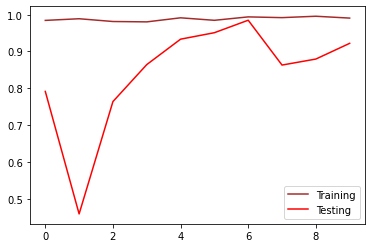

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='brown',label='Training')
plt.plot(history.history['val_accuracy'],color='red',label='Testing')
plt.legend()
plt.show()

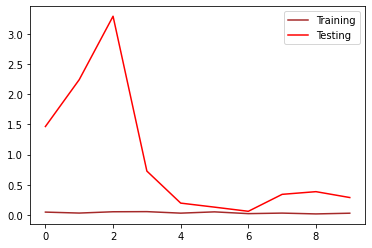

In [32]:
plt.plot(history.history['loss'],color='brown',label='Training')
plt.plot(history.history['val_loss'],color='red',label='Testing')
plt.legend()
plt.show()